In [16]:
# NOTE: This does NOT have points close to real ones removed!

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import sklearn

crime = pd.read_csv('E:/Vancouver Crime Final/Synthetic Data/both_bne_100k_combined.csv')

crime.head(20)

,type,datetime,year,month,day,hour,minute,Hour_Minute,hundred_block,utm_x,...,signal_200,trees_25,trees_100,rain_mm,snow_cm,total_precip_mm,temp_c,humidity,pressure,hours_of_light
0,Break and Enter Residential/Other,2003-01-01 00:00:00,2003,1,1,0,0,0.000000,9XX W 15TH AVE,490791.12,...,2,0,32,21.6,0.0,21.6,5.8,81.0,101.70,9.53
1,Break and Enter Commercial,2003-01-01 00:00:00,2003,1,1,0,0,0.000000,64XX VICTORIA DR,495220.95,...,2,5,40,21.6,0.0,21.6,5.8,81.0,101.70,9.53
2,Break and Enter Residential/Other,2003-01-01 00:00:00,2003,1,1,0,1,0.016667,34XX W 42ND AVE,486837.11,...,3,6,38,21.6,0.0,21.6,5.8,81.0,101.70,9.53
3,Break and Enter Residential/Other,2003-01-01 00:00:00,2003,1,1,0,20,0.333333,19XX PARKER ST,495279.46,...,1,8,88,21.6,0.0,21.6,5.8,81.0,101.70,9.53
4,Break and Enter Residential/Other,2003-01-01 01:01:00,2003,1,1,1,46,1.766667,45XX MAIN ST,492627.84,...,2,8,83,21.6,0.0,21.6,6.2,78.0,101.73,9.53
5,Break and Enter Residential/Other,2003-01-01 04:04:00,2003,1,1,4,0,4.000000,25XX GRAVELEY ST,496100.23,...,0,7,73,21.6,0.0,21.6,5.5,88.0,101.70,9.53
6,Break and Enter Residential/Other,2003-01-01 04:04:00,2003,1,1,4,30,4.500000,15XX SE MARINE DR,494572.37,...,1,0,41,21.6,0.0,21.6,5.5,88.0,101.70,9.53
7,Break and Enter Commercial,2003-01-01 06:06:00,2003,1,1,6,0,6.000000,5XX W GEORGIA ST,491507.39,...,10,2,27,21.6,0.0,21.6,5.5,96.0,101.58,9.53
8,Break and Enter Commercial,2003-01-01 07:07:00,2003,1,1,7,13,7.216667,18XX W 57TH AVE,489132.03,...,0,8,73,21.6,0.0,21.6,5.8,95.0,101.50,9.53
9,Break and Enter Commercial,2003-01-01 07:07:00,2003,1,1,7,13,7.216667,45XX FRASER ST,493431.80,...,2,2,19,21.6,0.0,21.6,5.8,95.0,101.50,9.53


In [17]:
# Set Break and ENters to 1 and everything else to 0

crime = crime.replace(['NONE'], 0)

crime = crime.replace(['Break and Enter Residential/Other', 'Break and Enter Commercial'], 1)
crime.head()

,type,datetime,year,month,day,hour,minute,Hour_Minute,hundred_block,utm_x,...,signal_200,trees_25,trees_100,rain_mm,snow_cm,total_precip_mm,temp_c,humidity,pressure,hours_of_light
0,1,2003-01-01 00:00:00,2003,1,1,0,0,0.000000,9XX W 15TH AVE,490791.12,...,2,0,32,21.6,0.0,21.6,5.8,81.0,101.70,9.53
1,1,2003-01-01 00:00:00,2003,1,1,0,0,0.000000,64XX VICTORIA DR,495220.95,...,2,5,40,21.6,0.0,21.6,5.8,81.0,101.70,9.53
2,1,2003-01-01 00:00:00,2003,1,1,0,1,0.016667,34XX W 42ND AVE,486837.11,...,3,6,38,21.6,0.0,21.6,5.8,81.0,101.70,9.53
3,1,2003-01-01 00:00:00,2003,1,1,0,20,0.333333,19XX PARKER ST,495279.46,...,1,8,88,21.6,0.0,21.6,5.8,81.0,101.70,9.53
4,1,2003-01-01 01:01:00,2003,1,1,1,46,1.766667,45XX MAIN ST,492627.84,...,2,8,83,21.6,0.0,21.6,6.2,78.0,101.73,9.53


In [18]:
crime

,type,datetime,year,month,day,hour,minute,Hour_Minute,hundred_block,utm_x,...,signal_200,trees_25,trees_100,rain_mm,snow_cm,total_precip_mm,temp_c,humidity,pressure,hours_of_light
0,1,2003-01-01 00:00:00,2003,1,1,0,0,0.000000,9XX W 15TH AVE,490791.120000,...,2,0,32,21.6,0.0,21.6,5.8,81.0,101.70,9.53
1,1,2003-01-01 00:00:00,2003,1,1,0,0,0.000000,64XX VICTORIA DR,495220.950000,...,2,5,40,21.6,0.0,21.6,5.8,81.0,101.70,9.53
2,1,2003-01-01 00:00:00,2003,1,1,0,1,0.016667,34XX W 42ND AVE,486837.110000,...,3,6,38,21.6,0.0,21.6,5.8,81.0,101.70,9.53
3,1,2003-01-01 00:00:00,2003,1,1,0,20,0.333333,19XX PARKER ST,495279.460000,...,1,8,88,21.6,0.0,21.6,5.8,81.0,101.70,9.53
4,1,2003-01-01 01:01:00,2003,1,1,1,46,1.766667,45XX MAIN ST,492627.840000,...,2,8,83,21.6,0.0,21.6,6.2,78.0,101.73,9.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204154,0,2018-02-07 12:46:00,2018,2,7,12,46,12.766667,9XX E 27TH AVE,493764.962443,...,0,11,64,2.0,0.0,2.0,8.7,95.0,102.79,10.87
204155,0,2004-12-31 00:20:00,2004,12,31,0,20,0.333333,ODLUM DR / WILLIAM ST,494477.870000,...,1,7,46,2.0,0.0,2.0,3.5,92.0,100.42,9.52
204156,0,2008-08-27 01:35:00,2008,8,27,1,35,1.583333,9XX E 62ND AV,493674.480000,...,0,7,74,4.2,0.0,4.2,11.3,92.0,101.00,14.82
204157,0,2018-02-14 22:55:00,2018,2,14,22,55,22.916667,E 29TH AVE / QUEBEC ST,492535.810000,...,3,10,67,6.2,0.0,6.2,1.9,93.0,102.27,11.24


In [19]:
### Begin Processing the Data


# Import Pre-processing module
from sklearn import preprocessing

# Create Label Encoder
le = preprocessing.LabelEncoder()

# Convert the string columns to numeric
# .astype(str) to ensude they are read as strings and not as mixed types
crime['datetime'] = le.fit_transform(crime['datetime'].astype(str))
crime['hundred_block'] = le.fit_transform(crime['hundred_block'].astype(str))


# Display the results
crime

,type,datetime,year,month,day,hour,minute,Hour_Minute,hundred_block,utm_x,...,signal_200,trees_25,trees_100,rain_mm,snow_cm,total_precip_mm,temp_c,humidity,pressure,hours_of_light
0,1,0,2003,1,1,0,0,0.000000,14750,490791.120000,...,2,0,32,21.6,0.0,21.6,5.8,81.0,101.70,9.53
1,1,0,2003,1,1,0,0,0.000000,11810,495220.950000,...,2,5,40,21.6,0.0,21.6,5.8,81.0,101.70,9.53
2,1,0,2003,1,1,0,1,0.016667,7246,486837.110000,...,3,6,38,21.6,0.0,21.6,5.8,81.0,101.70,9.53
3,1,0,2003,1,1,0,20,0.333333,2674,495279.460000,...,1,8,88,21.6,0.0,21.6,5.8,81.0,101.70,9.53
4,1,2,2003,1,1,1,46,1.766667,9153,492627.840000,...,2,8,83,21.6,0.0,21.6,6.2,78.0,101.73,9.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204154,0,154654,2018,2,7,12,46,12.766667,14643,493764.962443,...,0,11,64,2.0,0.0,2.0,8.7,95.0,102.79,10.87
204155,0,23216,2004,12,31,0,20,0.333333,19639,494477.870000,...,1,7,46,2.0,0.0,2.0,3.5,92.0,100.42,9.52
204156,0,62956,2008,8,27,1,35,1.583333,14669,493674.480000,...,0,7,74,4.2,0.0,4.2,11.3,92.0,101.00,14.82
204157,0,154860,2018,2,14,22,55,22.916667,16931,492535.810000,...,3,10,67,6.2,0.0,6.2,1.9,93.0,102.27,11.24


In [20]:
# Scale the Data

columns = [col for col in crime if col not in ['type']]


# Properly scale the reduced set of features
features = crime[columns]

from sklearn.preprocessing import MinMaxScaler
scaler = preprocessing.MinMaxScaler()

print(scaler.fit(features))

MinMaxScaler(copy=True, feature_range=(0, 1))


In [21]:
# Properly scale the features

columns = [col for col in crime if col not in ['type']]

# Properly scale the reduced set of features
features = crime[columns]


scaler = MinMaxScaler().fit(features.values) # scaler = MinMaxScaler().fit(features.values)
features = scaler.transform(features.values) # features = scaler.transform(features.values)
crime[columns] = features
crime

,type,datetime,year,month,day,hour,minute,Hour_Minute,hundred_block,utm_x,...,signal_200,trees_25,trees_100,rain_mm,snow_cm,total_precip_mm,temp_c,humidity,pressure,hours_of_light
0,1,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.674934,0.485368,...,0.142857,0.00000,0.244275,0.235808,0.0,0.235808,0.408421,0.781609,0.609459,0.010909
1,1,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.540405,0.788787,...,0.142857,0.15625,0.305344,0.235808,0.0,0.235808,0.408421,0.781609,0.609459,0.010909
2,1,0.000000,0.0000,0.000000,0.000000,0.000000,0.016949,0.000695,0.331564,0.214540,...,0.214286,0.18750,0.290076,0.235808,0.0,0.235808,0.408421,0.781609,0.609459,0.010909
3,1,0.000000,0.0000,0.000000,0.000000,0.000000,0.338983,0.013899,0.122357,0.792795,...,0.071429,0.25000,0.671756,0.235808,0.0,0.235808,0.408421,0.781609,0.609459,0.010909
4,1,0.000012,0.0000,0.000000,0.000000,0.043478,0.779661,0.073662,0.418825,0.611173,...,0.142857,0.25000,0.633588,0.235808,0.0,0.235808,0.416842,0.747126,0.613514,0.010909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204154,0,0.914447,0.9375,0.090909,0.200000,0.521739,0.779661,0.532314,0.670038,0.689060,...,0.000000,0.34375,0.488550,0.021834,0.0,0.021834,0.469474,0.942529,0.756757,0.173333
204155,0,0.137273,0.0625,1.000000,1.000000,0.000000,0.338983,0.013899,0.898646,0.737890,...,0.071429,0.21875,0.351145,0.021834,0.0,0.021834,0.360000,0.908046,0.436486,0.009697
204156,0,0.372250,0.3125,0.636364,0.866667,0.043478,0.593220,0.066018,0.671227,0.682862,...,0.000000,0.21875,0.564885,0.045852,0.0,0.045852,0.524211,0.908046,0.514865,0.652121
204157,0,0.915665,0.9375,0.090909,0.433333,0.956522,0.932203,0.955525,0.774732,0.604870,...,0.214286,0.31250,0.511450,0.067686,0.0,0.067686,0.326316,0.919540,0.686486,0.218182


In [22]:
# split training data into training and testing
from sklearn.model_selection import train_test_split

# Select columns to that are data
cols = [col for col in crime if col not in ['type', 'minute', 'Hour_Minute', 'latitude', 'longitude', 'datetime']]

X = crime[cols]

# Select target data
y = crime['type']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.3)
print(X_train.shape)

(142911, 24)


In [23]:
X_train

,year,month,day,hour,hundred_block,utm_x,utm_y,light_pole_12_5,light_pole_25,light_pole_50,...,signal_200,trees_25,trees_100,rain_mm,snow_cm,total_precip_mm,temp_c,humidity,pressure,hours_of_light
111865,0.5625,0.090909,0.200000,0.086957,0.738446,0.362105,0.654789,0.000000,0.029851,0.038462,...,0.000000,0.00000,0.091603,0.000000,0.0,0.000000,0.277895,0.908046,0.562162,0.169697
126893,0.6250,0.181818,0.366667,0.565217,0.521735,0.783722,0.249916,0.000000,0.014925,0.064103,...,0.142857,0.09375,0.358779,0.192140,0.0,0.192140,0.511579,0.724138,0.593243,0.402424
52976,0.3750,0.454545,0.033333,0.304348,0.482017,0.535677,0.294698,0.035714,0.014925,0.128205,...,0.071429,0.25000,0.335878,0.000000,0.0,0.000000,0.673684,0.505747,0.586486,0.963636
42606,0.2500,0.818182,0.500000,0.565217,0.572435,0.664330,0.688518,0.035714,0.014925,0.076923,...,0.214286,0.18750,0.641221,0.072052,0.0,0.072052,0.505263,0.735632,0.363514,0.290909
79077,0.6875,0.636364,0.633333,0.956522,0.060858,0.431690,0.605003,0.071429,0.044776,0.410256,...,0.214286,0.00000,0.099237,0.000000,0.0,0.000000,0.658947,0.701149,0.572973,0.707879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194442,0.8125,0.909091,0.600000,0.478261,0.279262,0.586941,0.749816,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.021834,0.0,0.021834,0.494737,0.724138,0.459459,0.081212
65615,0.5000,1.000000,0.266667,0.478261,0.483939,0.521147,0.293253,0.035714,0.044776,0.102564,...,0.071429,0.18750,0.190840,0.000000,0.0,0.000000,0.353684,0.816092,0.741892,0.013333
77655,0.6875,0.363636,0.333333,0.869565,0.433651,0.467926,0.368430,0.000000,0.029851,0.038462,...,0.071429,0.31250,0.496183,0.000000,0.0,0.000000,0.566316,0.724138,0.714865,0.844848
56088,0.4375,0.000000,0.133333,0.652174,0.459595,0.711052,0.333695,0.000000,0.014925,0.076923,...,0.000000,0.28125,0.374046,0.010917,0.0,0.010917,0.454737,0.873563,0.658108,0.019394


In [24]:
# Trying Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

model_tree = RandomForestClassifier(random_state=100, n_estimators=50)
model_tree.fit(X_train, y_train)
print(model_tree.feature_importances_)
sel_model_tree = SelectFromModel(estimator=model_tree, prefit=True, threshold='mean')  
      # since we already fit the data, we specify prefit option here
      # Features whose importance is greater or equal to the threshold are kept while the others are discarded.
X_train_sfm_tree = sel_model_tree.transform(X_train)
print(sel_model_tree.get_support())

feature_importances = pd.DataFrame(model_tree.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', 
                                                                        ascending=False)
feature_importances

[0.04191794 0.02326572 0.03772571 0.04253302 0.22847954 0.07129137
 0.07751456 0.01685855 0.02409001 0.03391636 0.05020558 0.00337536
 0.00377614 0.01280008 0.02563706 0.03361608 0.05204759 0.02142902
 0.00177034 0.02153555 0.04554495 0.0402595  0.04579822 0.04461174]
[ True False False  True  True  True  True False False False  True False
 False False False False  True False False False  True False  True  True]


,importance
hundred_block,0.228480
utm_y,0.077515
utm_x,0.071291
trees_100,0.052048
light_pole_100,0.050206
pressure,0.045798
temp_c,0.045545
hours_of_light,0.044612
hour,0.042533
year,0.041918


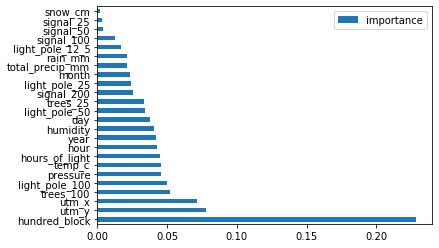

In [25]:
feature_importances.plot.barh()

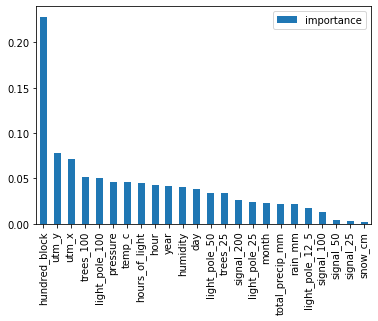

In [26]:
feature_importances.plot.bar()

In [27]:
# Simple Neural Network

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

# import needed modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

In [28]:
# Try using the MLP Classifier
mlp = MLPClassifier(hidden_layer_sizes=(24, 24, 24), activation='relu', solver='adam', max_iter=300)
mlp.fit(X_train, y_train)

predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

In [29]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_train, predict_train))
print(classification_report(y_train, predict_train))

[[41490 28642]
 [10330 62449]]
              precision    recall  f1-score   support

           0       0.80      0.59      0.68     70132
           1       0.69      0.86      0.76     72779

    accuracy                           0.73    142911
   macro avg       0.74      0.72      0.72    142911
weighted avg       0.74      0.73      0.72    142911



In [30]:
print(confusion_matrix(y_test, predict_test))
print(classification_report(y_test, predict_test))

[[17492 12398]
 [ 4510 26848]]
              precision    recall  f1-score   support

           0       0.80      0.59      0.67     29890
           1       0.68      0.86      0.76     31358

    accuracy                           0.72     61248
   macro avg       0.74      0.72      0.72     61248
weighted avg       0.74      0.72      0.72     61248



In [ ]:
# Try using the MLP Classifier
mlp = MLPClassifier(hidden_layer_sizes=(29, 29, 29), activation='relu', solver='adam', max_iter=3000)
mlp.fit(X_train, y_train)

predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

In [ ]:
print(confusion_matrix(y_train, predict_train))
print(classification_report(y_train, predict_train))

In [ ]:
print(confusion_matrix(y_test, predict_test))
print(classification_report(y_test, predict_test))

In [ ]:
############################# END HERE ###################################

In [ ]:
feature_importances

In [ ]:
# Cut down features

# split training data into training and testing
from sklearn.model_selection import train_test_split

# Select columns to that are data
cols = [col for col in crime if col not in ['type', 'minute', 'hour', 'latitude', 'longitude', 'datetime']]

X = crime[cols]

# Select target data
y = crime['type']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.3)
print(X_train.shape)

In [ ]:
X_train

In [ ]:
y_train

In [ ]:
# Trying Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

model_tree = RandomForestClassifier(random_state=100, n_estimators=50)
model_tree.fit(X_train, y_train)
print(model_tree.feature_importances_)
sel_model_tree = SelectFromModel(estimator=model_tree, prefit=True, threshold='mean')  
      # since we already fit the data, we specify prefit option here
      # Features whose importance is greater or equal to the threshold are kept while the others are discarded.
X_train_sfm_tree = sel_model_tree.transform(X_train)
print(sel_model_tree.get_support())

feature_importances = pd.DataFrame(model_tree.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', 
                                                                        ascending=False)
feature_importances

In [ ]:
# Try using the MLP Classifier
mlp = MLPClassifier(hidden_layer_sizes=(24, 24, 24), activation='relu', solver='adam', max_iter=300)
mlp.fit(X_train, y_train)

predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

In [ ]:
print(confusion_matrix(y_train, predict_train))
print(classification_report(y_train, predict_train))

In [ ]:
print(confusion_matrix(y_test, predict_test))
print(classification_report(y_test, predict_test))